In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from src.jaywalk_gym.jaywalk_env import JaywalkEnv, EnvParams

params = EnvParams(
    use_traffic_light=False,
    max_reward=100,
    wait_reward=-1,
    death_reward=-50,
    num_lane_groups=3,
    max_vehicles=30,
    p_vehicle_spawn=0.8,
    p_vehicle_stop=0.5,
)
env = JaywalkEnv(params)

In [3]:
from src.agents.qlearning import QLearningAgent


training_results = []

for alpha in [0.001, 0.01, 0.1]:
    for epsilon in [0.001, 0.01, 0.1]:
        train_parameters = {
            "state_dim": env.grid_shape[0] * env.grid_shape[1] + 3,
            "action_dim": 3,
            "action_space": [0, 1, 2],
            "gamma": 0.99,
            "timeout": 200,
            "epsilon": epsilon,
            "alpha": alpha,
            "device": "cpu",
            "episodes": 100_000,
        }

        agent = QLearningAgent(env, train_parameters)
        result = agent.train(train_parameters["episodes"])

        training_results.append(result)
        del agent

100%|██████████| 100000/100000 [02:42<00:00, 616.72it/s]


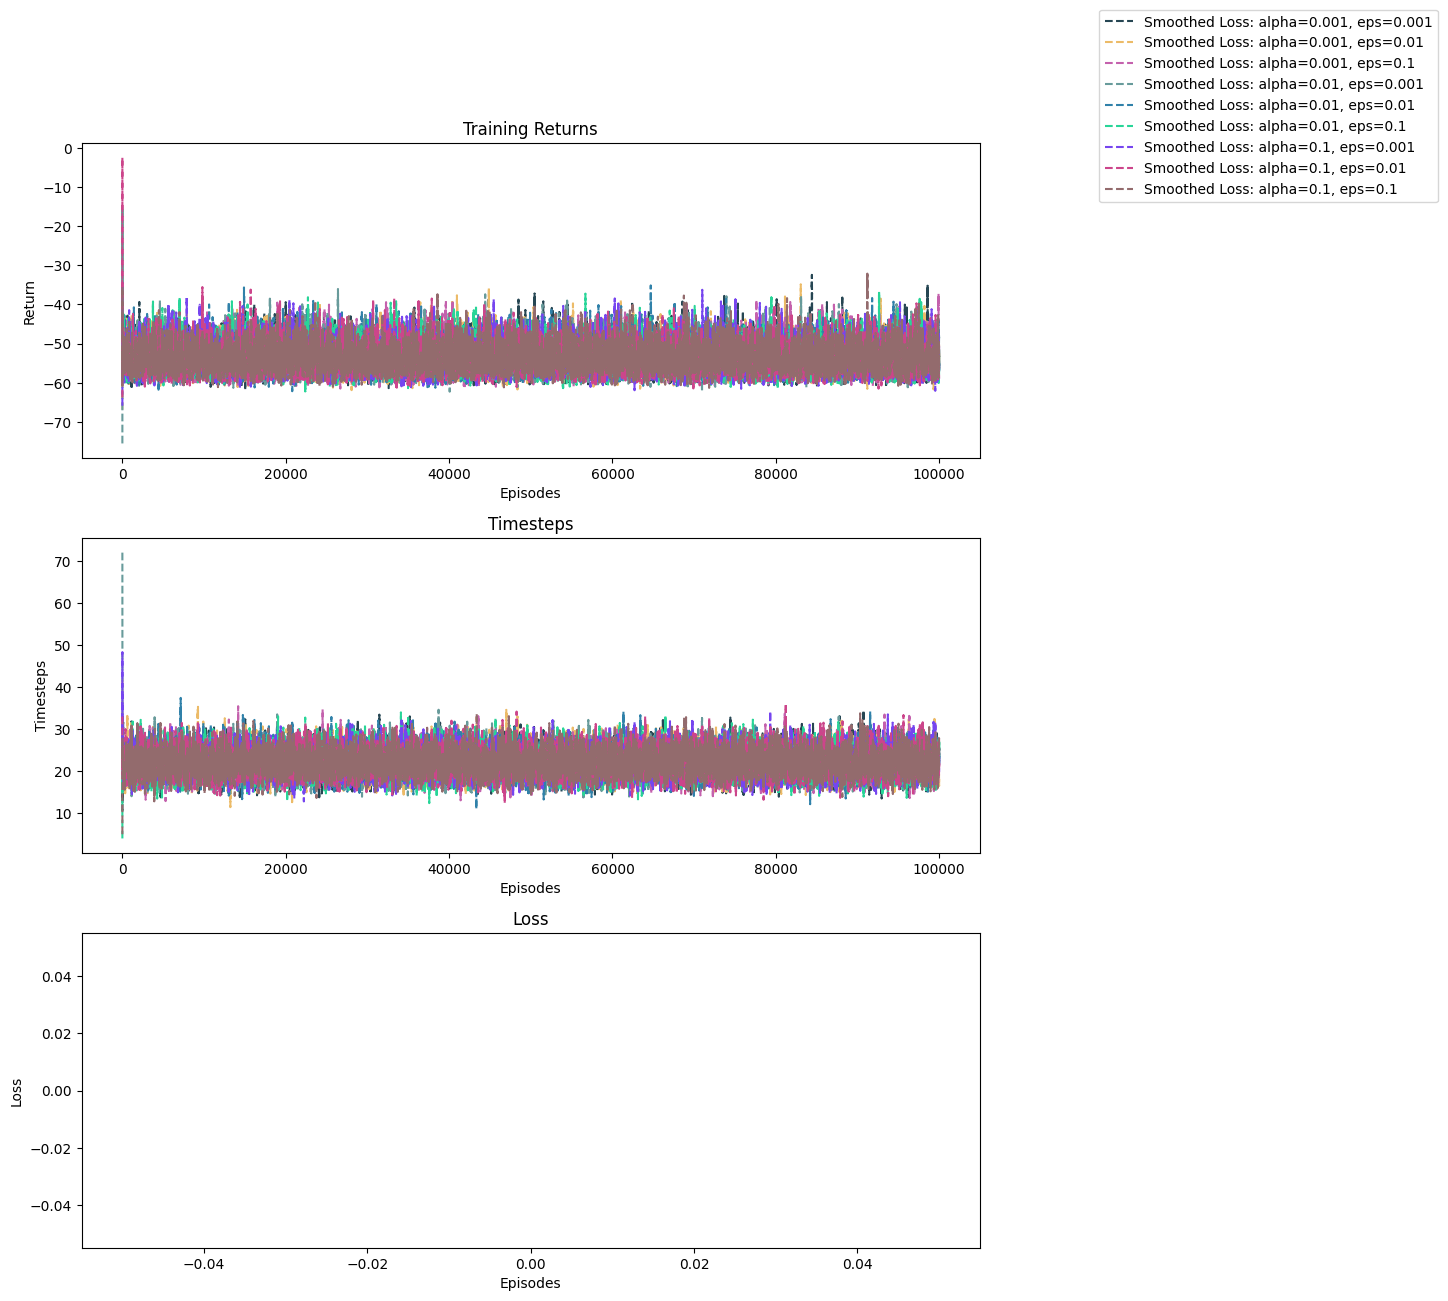

In [4]:
QLearningAgent.plot_multiple_training_result(
    training_results=training_results,
    hyperparams=[
        "alpha=0.001, eps=0.001",
        "alpha=0.001, eps=0.01",
        "alpha=0.001, eps=0.1",
        "alpha=0.01, eps=0.001",
        "alpha=0.01, eps=0.01",
        "alpha=0.01, eps=0.1",
        "alpha=0.1, eps=0.001",
        "alpha=0.1, eps=0.01",
        "alpha=0.1, eps=0.1",
    ],
)